# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'a8949efee5d36da5e3150cbe4e88f6b6'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[0:10])

['puerto escondido', 'kieta', 'inhambane', 'tsihombe', 'san ramon', 'ixtapa', 'kapaa', 'bredasdorp', 'torbay', 'vallenar']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# Create empty lists to append data retirieved from API 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop counter and batch
counter = 1
batch = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    if counter == 60 :
        time.sleep(60)
        counter += 1
        batch += 1
        response = requests.get(query_url).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter}  of batch {batch} | {city_record}")
    else:
        # Try statement to append calls where value is found 
        # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
        try: 
            response = requests.get(query_url).json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {counter}  of batch {batch} | {city_record}")

            counter += 1

        # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
        continue

Beginning Data Retrieval
-------------------------------
Processing Record 1  of batch 1 | Puerto Escondido
Processing Record 2  of batch 1 | Kieta
Processing Record 3  of batch 1 | Inhambane
City not found. Skipping...
Processing Record 4  of batch 1 | San Ramon
Processing Record 5  of batch 1 | Ixtapa
Processing Record 6  of batch 1 | Kapaa
Processing Record 7  of batch 1 | Bredasdorp
Processing Record 8  of batch 1 | Torbay
Processing Record 9  of batch 1 | Vallenar
Processing Record 10  of batch 1 | Tabas
Processing Record 11  of batch 1 | Mount Gambier
Processing Record 12  of batch 1 | Barrow
Processing Record 13  of batch 1 | Jamestown
Processing Record 14  of batch 1 | Oregon
Processing Record 15  of batch 1 | Laguna
Processing Record 16  of batch 1 | Rikitea
Processing Record 17  of batch 1 | Fairbanks
Processing Record 18  of batch 1 | Mecca
Processing Record 19  of batch 1 | Klaksvik
Processing Record 20  of batch 1 | Mar del Plata
Processing Record 21  of batch 1 | Khatanga

Processing Record 175  of batch 2 | Sao Filipe
Processing Record 176  of batch 2 | Ilulissat
Processing Record 177  of batch 2 | Golpayegan
Processing Record 178  of batch 2 | Novo Aripuana
Processing Record 179  of batch 2 | Whittlesea
Processing Record 180  of batch 2 | Yulara
Processing Record 181  of batch 2 | Nawabganj
Processing Record 182  of batch 2 | Arona
Processing Record 183  of batch 2 | Luderitz
Processing Record 184  of batch 2 | Mansa
Processing Record 185  of batch 2 | Moron
Processing Record 186  of batch 2 | Kodiak
Processing Record 187  of batch 2 | Devils Lake
Processing Record 188  of batch 2 | Takoradi
Processing Record 189  of batch 2 | Innisfail
Processing Record 190  of batch 2 | Labuhan
Processing Record 191  of batch 2 | Estreito
Processing Record 192  of batch 2 | Okha
Processing Record 193  of batch 2 | Altay
City not found. Skipping...
City not found. Skipping...
Processing Record 194  of batch 2 | Camalu
Processing Record 195  of batch 2 | Mercedes
Proce

Processing Record 350  of batch 2 | Suruc
Processing Record 351  of batch 2 | Ithaca
Processing Record 352  of batch 2 | Vila Franca do Campo
Processing Record 353  of batch 2 | Ust-Barguzin
Processing Record 354  of batch 2 | Yermakovskoye
Processing Record 355  of batch 2 | Olinda
Processing Record 356  of batch 2 | Bure
City not found. Skipping...
Processing Record 357  of batch 2 | Adrar
Processing Record 358  of batch 2 | Pevek
Processing Record 359  of batch 2 | Gorahun
Processing Record 360  of batch 2 | Broken Hill
Processing Record 361  of batch 2 | Los Llanos de Aridane
Processing Record 362  of batch 2 | Alice Springs
Processing Record 363  of batch 2 | Makakilo City
Processing Record 364  of batch 2 | Martin
Processing Record 365  of batch 2 | Saurimo
Processing Record 366  of batch 2 | Griffith
Processing Record 367  of batch 2 | Mahebourg
Processing Record 368  of batch 2 | Salcininkai
Processing Record 369  of batch 2 | Carbonia
Processing Record 370  of batch 2 | Kidal


Processing Record 519  of batch 2 | Tilichiki
City not found. Skipping...
Processing Record 520  of batch 2 | Sisimiut
Processing Record 521  of batch 2 | Saint-Augustin
City not found. Skipping...
Processing Record 522  of batch 2 | Blagoyevo
Processing Record 523  of batch 2 | Bambanglipuro
Processing Record 524  of batch 2 | Okhotsk
City not found. Skipping...
Processing Record 525  of batch 2 | Nyurba
Processing Record 526  of batch 2 | Dwarka
City not found. Skipping...
Processing Record 527  of batch 2 | Villa Maria
Processing Record 528  of batch 2 | Ohafia
Processing Record 529  of batch 2 | Pervouralsk
Processing Record 530  of batch 2 | Nassau
Processing Record 531  of batch 2 | Esik
Processing Record 532  of batch 2 | Rocha
Processing Record 533  of batch 2 | Fossano
Processing Record 534  of batch 2 | Jais
Processing Record 535  of batch 2 | Vilyuysk
Processing Record 536  of batch 2 | Paciran
Processing Record 537  of batch 2 | Kirkuk
Processing Record 538  of batch 2 | Ry

In [7]:
with open('extracted_data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["City", "Cloudiness", "Country","Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
    writer.writerows(zip(city_name, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# File to Load (Remember to Change These)
file_to_load = "extracted_data.csv"

#Read Purchasing File and store into Pandas data frame
weather_data = pd.read_csv(file_to_load)

In [9]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Escondido,75,MX,1569986958,69,15.86,-97.07,82.40,4.63
1,Kieta,100,PG,1569986958,73,-6.22,155.63,82.22,3.74
2,Inhambane,84,MZ,1569986958,83,-23.87,35.38,62.16,4.94
3,San Ramon,100,NI,1569986958,98,12.92,-85.84,67.22,2.08
4,Ixtapa,90,MX,1569986959,100,20.71,-105.21,75.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

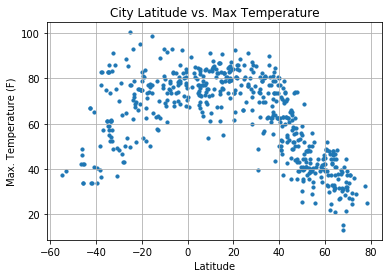

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_temp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

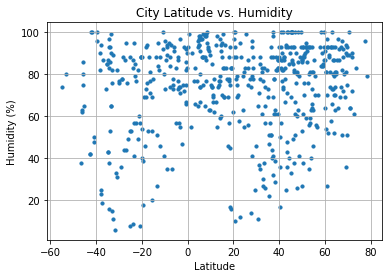

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_hum.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

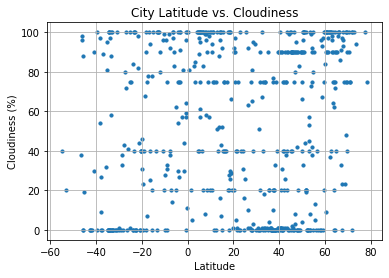

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_cloud.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

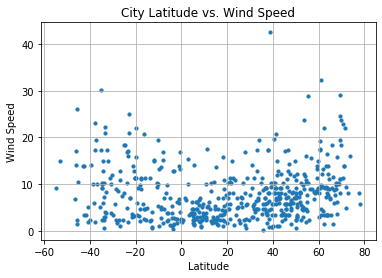

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_wind.png')

# Show plot
plt.show()